In [595]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

%matplotlib inline

In [596]:

# plt.style.use('seaborn')
# mu = 100
# variance = 10
# sigma = math.sqrt(variance)

# delta_i = 102.5
# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# y = stats.norm.pdf(x, mu, sigma)
# plt.plot(x, y,color = 'blue')
# plt.axvline(x=delta_i, color = 'red', alpha = 0.5)
# plt.text(102.7,0.11,r'$1 - \Phi_\mu,_\sigma$(S)',color='red', fontsize=12)
# plt.fill_between(x,y, where=x>delta_i,color='red', alpha = 0.2)
# plt.xlabel("Distribution of S")
# plt.savefig('plot_fundamental_investors.png');

In [671]:
alpha = 10000
beta = 10000
gamma = 10000
L = alpha + beta + gamma #total population

mu = 150.0 #parameters for the valuation distribution
sigma = 50.0

deltas = np.random.normal(loc=mu, scale=sigma, size=[alpha]) #sample fundamental valuations
S = 100.0


n_years = 0.01
freq = 100
dates = np.linspace(start=0,stop=n_years,num=freq) 

prices = [S]
pop_buyers = 0
pop_sellers = 0

for t in dates[1:]:
    lambdas_up =  deltas[deltas - S>0] - S #optimistic investors (sample valuation above S)
    lambdas_down = - deltas[deltas - S<=0] + S #pessimistic investors (sample valuation below S)
    
    pop_buyers = sum([np.random.exponential(scale = 1/l)<=t for l in lambdas_up])
    pop_sellers = sum([np.random.exponential(scale = 1/l)<=t for l in lambdas_down])
    

    quantile = pop_buyers / (pop_buyers + pop_sellers)
 
    S = stats.norm.ppf(quantile,loc = S,scale = sigma) #update S to reflect the balance between supply and demand
    
    prices.append(S)
    
prices = pd.DataFrame(data = prices, index = dates)

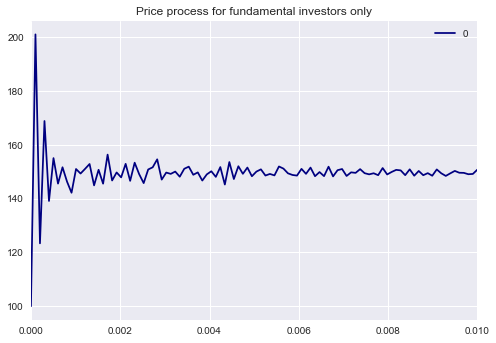

In [673]:
plt.style.use('seaborn')
ax = prices.plot(colormap='jet', title='Price process for fundamental investors only')

$$\pi{}_\alpha{}_+^\infty = \alpha{} (1 - \phi{}_\mu{},_\sigma{}(S))$$

Here, $\pi{}_\alpha{}_+^\infty$ is the following: 

And $\pi{}_\alpha{}_-^\infty$, representing the asymptotical population of short sellers, is the following: 

In [93]:
sum(prob_sell)

66.12495450388066